# Causal Inference Notebook

In [1]:
import pandas as pd 
import os, sys
from sklearn.preprocessing import Normalizer
import warnings 
warnings.filterwarnings("ignore") 

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from data_pipeline import fetch_clean_data


## Prepare the data

### Preview

In [2]:
df = fetch_clean_data()

In [6]:
df.columns

Index(['id', 'order_id', 'driver_id', 'lat', 'lng', 'trip_start_time',
       'trip_end_time', 'origin_lat', 'origin_lon', 'dest_lat', 'dest_lon',
       'distance', 'year', 'month', 'isWeekDay', 'hour', 'duration',
       'isHoliday', 'speed', 'driver_proximity', 'fulfilled'],
      dtype='object')

In [29]:
df.describe()

,id,order_id,driver_id,lat,lng,origin_lat,origin_lon,dest_lat,dest_lon,distance,year,month,isWeekDay,hour,duration,isHoliday,speed,driver_proximity,fulfilled
count,2.587100e+04,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000
mean,8.037295e+05,420032.315025,236950.182869,6.528154,3.389208,6.528024,3.389423,6.522929,3.401055,11536.180757,2021.000116,6.999536,0.855591,13.229717,3772.363109,0.144409,13.412700,1593.513835,0.970585
std,5.060676e+05,16506.709366,19629.496290,0.071303,0.080260,0.079433,0.081154,0.102009,0.098738,12136.372978,0.010768,0.060277,0.351511,3.102313,7115.513966,0.351511,80.391011,4647.080656,0.168970
min,1.000000e+00,392001.000000,121981.000000,6.415885,3.076561,1.000000,1.000000,1.000000,1.000000,16.471055,2021.000000,1.000000,0.000000,0.000000,16.000000,0.000000,0.005076,0.000000,0.000000
25%,3.681465e+05,405690.500000,243203.000000,6.453507,3.343523,6.455103,3.345503,6.449389,3.346477,5369.247981,2021.000000,7.000000,1.000000,11.000000,1668.000000,0.000000,1.999265,821.627089,1.000000
50%,7.268880e+05,420379.000000,243679.000000,6.527532,3.369349,6.527243,3.371989,6.514889,3.379300,9816.814170,2021.000000,7.000000,1.000000,13.000000,2776.000000,0.000000,3.226599,1414.880117,1.000000
75%,1.335426e+06,434017.500000,244147.000000,6.594942,3.427251,6.594339,3.423915,6.593874,3.460672,15841.895164,2021.000000,7.000000,1.000000,16.000000,4243.000000,0.000000,5.123073,1934.607405,1.000000
max,1.557678e+06,517948.000000,247877.000000,7.702536,8.515414,8.226835,8.522293,7.703160,8.607887,682878.368122,2022.000000,9.000000,1.000000,23.000000,326248.000000,1.000000,5153.210716,659052.705726,1.000000


In [9]:
df.min()

id                                   1
order_id                        392001
driver_id                       121981
lat                           6.415885
lng                           3.076561
trip_start_time    2021-07-01 06:39:51
trip_end_time      2021-07-01 07:25:03
origin_lat                         1.0
origin_lon                         1.0
dest_lat                           1.0
dest_lon                           1.0
distance                     16.471055
year                              2021
month                                1
isWeekDay                            0
hour                                 0
duration                          16.0
isHoliday                            0
speed                         0.005076
fulfilled                            0
dtype: object

In [12]:
df.max()

id                             1557678
order_id                        517948
driver_id                       247877
lat                           7.702536
lng                           8.515414
trip_start_time    2022-02-27 09:07:59
trip_end_time      2022-02-27 09:17:41
origin_lat                    8.226835
origin_lon                    8.522293
dest_lat                       7.70316
dest_lon                      8.607887
distance                 682878.368122
year                              2022
month                                9
isWeekDay                            1
hour                                23
duration                      326248.0
isHoliday                            1
speed                      5153.210716
fulfilled                            1
dtype: object

In [28]:
df.year.value_counts()

2021    25868
2022        3
Name: year, dtype: int64

In [49]:
# df = pd.to_csv('../data/final_processed.csv',index = False)
# df = pd.read_csv('../data/final_processed.csv')

### Drop Unwanted columns

In [50]:
unwanted_cols = ['id','order_id','driver_id','lat','lng','trip_start_time',
                 'trip_end_time','origin_lat','origin_lon','dest_lat','dest_lon','year','month','hour']
df_causal = df.drop(columns=unwanted_cols)

In [51]:
df_causal

,distance,isWeekDay,duration,isHoliday,speed,driver_proximity,fulfilled
0,21048.291786,1,217.0,0,96.996736,693.616345,1
1,8160.545042,1,2055.0,0,3.971068,1968.052120,1
2,5067.848407,1,3681.0,0,1.376759,2954.031519,1
3,5603.770382,1,2102.0,0,2.665923,1197.387881,1
4,19081.836553,1,2657.0,0,7.181722,197.983625,1
...,...,...,...,...,...,...,...
25866,2579.543899,1,2539.0,0,1.015968,1631.673193,1
25867,3605.326343,0,582.0,1,6.194719,2733.372507,1
25868,26721.690112,0,2861.0,1,9.339983,3098.207951,1
25869,18422.164135,1,4012.0,0,4.591766,1847.634112,1


### Normalise Data

In [52]:
def normalizer(df,columns) -> pd.DataFrame:
    """
    Returns dataframe with normalized columns
    """
    nrm = Normalizer()
    df_norm = df.copy(deep=True)
    df_norm[columns] = pd.DataFrame(
        nrm.fit_transform( df_norm[columns]), columns=columns
    )
    return df_norm
    # return df

In [53]:
df_causal_norm = normalizer(df_causal,columns=['distance','duration','speed','driver_proximity'])

In [54]:
df_causal

,distance,isWeekDay,duration,isHoliday,speed,driver_proximity,fulfilled
0,21048.291786,1,217.0,0,96.996736,693.616345,1
1,8160.545042,1,2055.0,0,3.971068,1968.052120,1
2,5067.848407,1,3681.0,0,1.376759,2954.031519,1
3,5603.770382,1,2102.0,0,2.665923,1197.387881,1
4,19081.836553,1,2657.0,0,7.181722,197.983625,1
...,...,...,...,...,...,...,...
25866,2579.543899,1,2539.0,0,1.015968,1631.673193,1
25867,3605.326343,0,582.0,1,6.194719,2733.372507,1
25868,26721.690112,0,2861.0,1,9.339983,3098.207951,1
25869,18422.164135,1,4012.0,0,4.591766,1847.634112,1


In [55]:
df_causal_norm

,distance,isWeekDay,duration,isHoliday,speed,driver_proximity,fulfilled
0,0.999394,1,0.010303,0,0.004606,0.032934,1
1,0.944247,1,0.237782,0,0.000459,0.227721,1
2,0.731792,1,0.531533,0,0.000199,0.426559,1
3,0.918103,1,0.344385,0,0.000437,0.196176,1
4,0.990392,1,0.137905,0,0.000373,0.010276,1
...,...,...,...,...,...,...,...
25866,0.649717,1,0.639505,0,0.000256,0.410974,1
25867,0.790359,0,0.127586,1,0.001358,0.599210,1
25868,0.987775,0,0.105758,1,0.000345,0.114526,1
25869,0.972439,1,0.211779,0,0.000242,0.097530,1


In [56]:
df_causal.fulfilled.value_counts()

1    25110
0      761
Name: fulfilled, dtype: int64

In [57]:
df_causal_norm.columns

Index(['distance', 'isWeekDay', 'duration', 'isHoliday', 'speed',
       'driver_proximity', 'fulfilled'],
      dtype='object')

In [58]:
# df_causal_norm.rename(columns={'distance':'di','isWeekDay':'w','hour':'h','duration':'du','isHoliday':'ho',
#                    'speed':'s','driver_proximity':'dr','fulfilled':'f'},inplace=True)

### Create Structure Model

In [59]:
from causalnex.structure import StructureModel

In [60]:
sm = StructureModel()


In [68]:
from causalnex.structure.notears import from_pandas

sm = from_pandas(df_causal_norm)

In [69]:
sm.edges

OutEdgeView([('distance', 'isWeekDay'), ('distance', 'duration'), ('distance', 'isHoliday'), ('distance', 'speed'), ('distance', 'driver_proximity'), ('distance', 'fulfilled'), ('isWeekDay', 'distance'), ('isWeekDay', 'duration'), ('isWeekDay', 'isHoliday'), ('isWeekDay', 'speed'), ('isWeekDay', 'driver_proximity'), ('isWeekDay', 'fulfilled'), ('duration', 'distance'), ('duration', 'isWeekDay'), ('duration', 'isHoliday'), ('duration', 'speed'), ('duration', 'driver_proximity'), ('duration', 'fulfilled'), ('isHoliday', 'distance'), ('isHoliday', 'isWeekDay'), ('isHoliday', 'duration'), ('isHoliday', 'speed'), ('isHoliday', 'driver_proximity'), ('isHoliday', 'fulfilled'), ('speed', 'distance'), ('speed', 'isWeekDay'), ('speed', 'duration'), ('speed', 'isHoliday'), ('speed', 'driver_proximity'), ('speed', 'fulfilled'), ('driver_proximity', 'distance'), ('driver_proximity', 'isWeekDay'), ('driver_proximity', 'duration'), ('driver_proximity', 'isHoliday'), ('driver_proximity', 'speed'), ('d

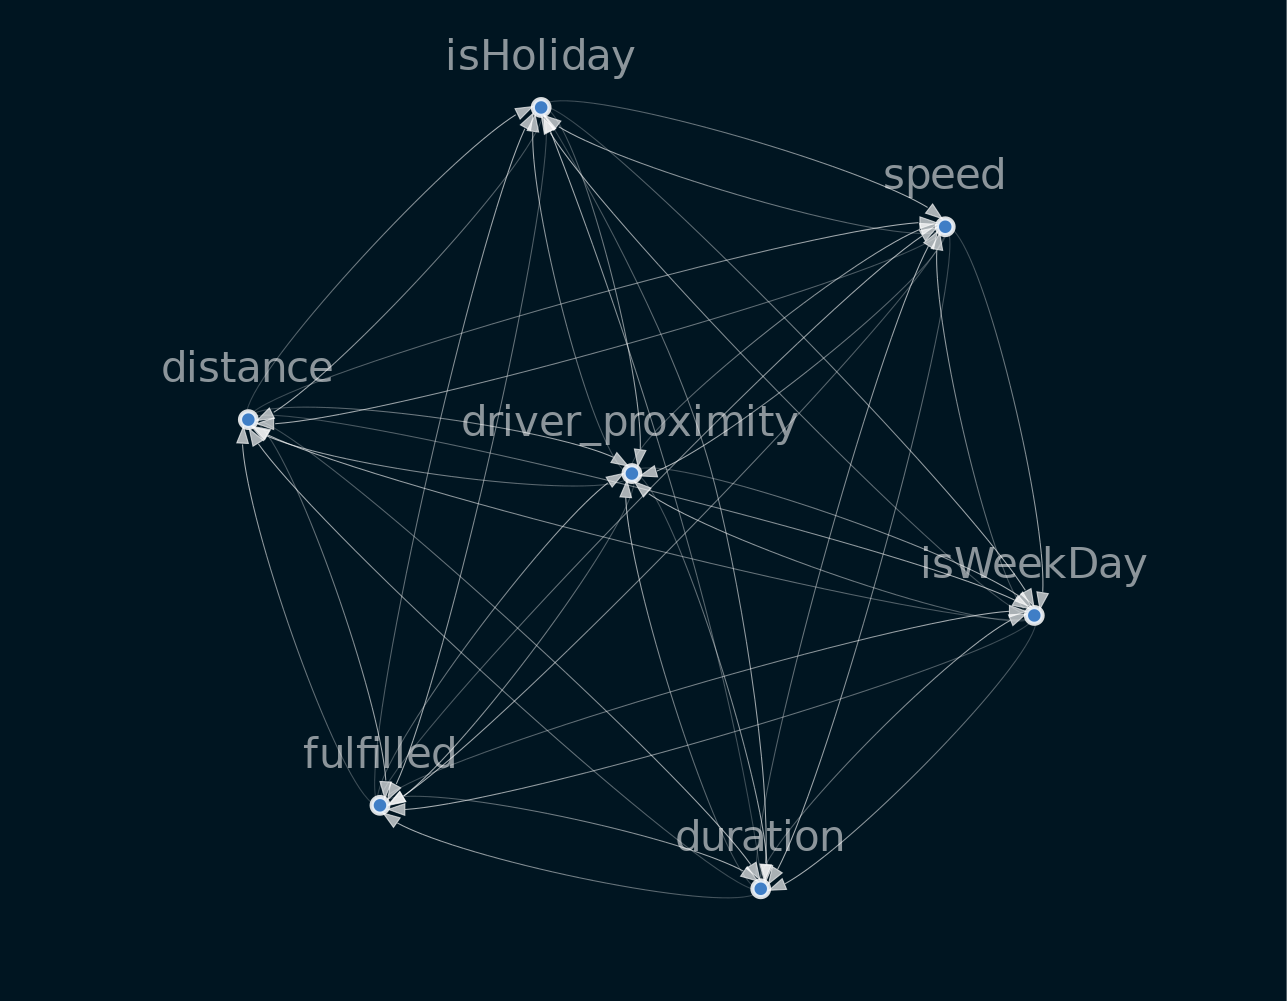

In [70]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(
    sm,
    graph_attributes={"scale": "2"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    
)
Image(viz.draw(format='png'))

# The graph shows all of the features connected

### Remove Edges below certain threshold to identify the important causal features

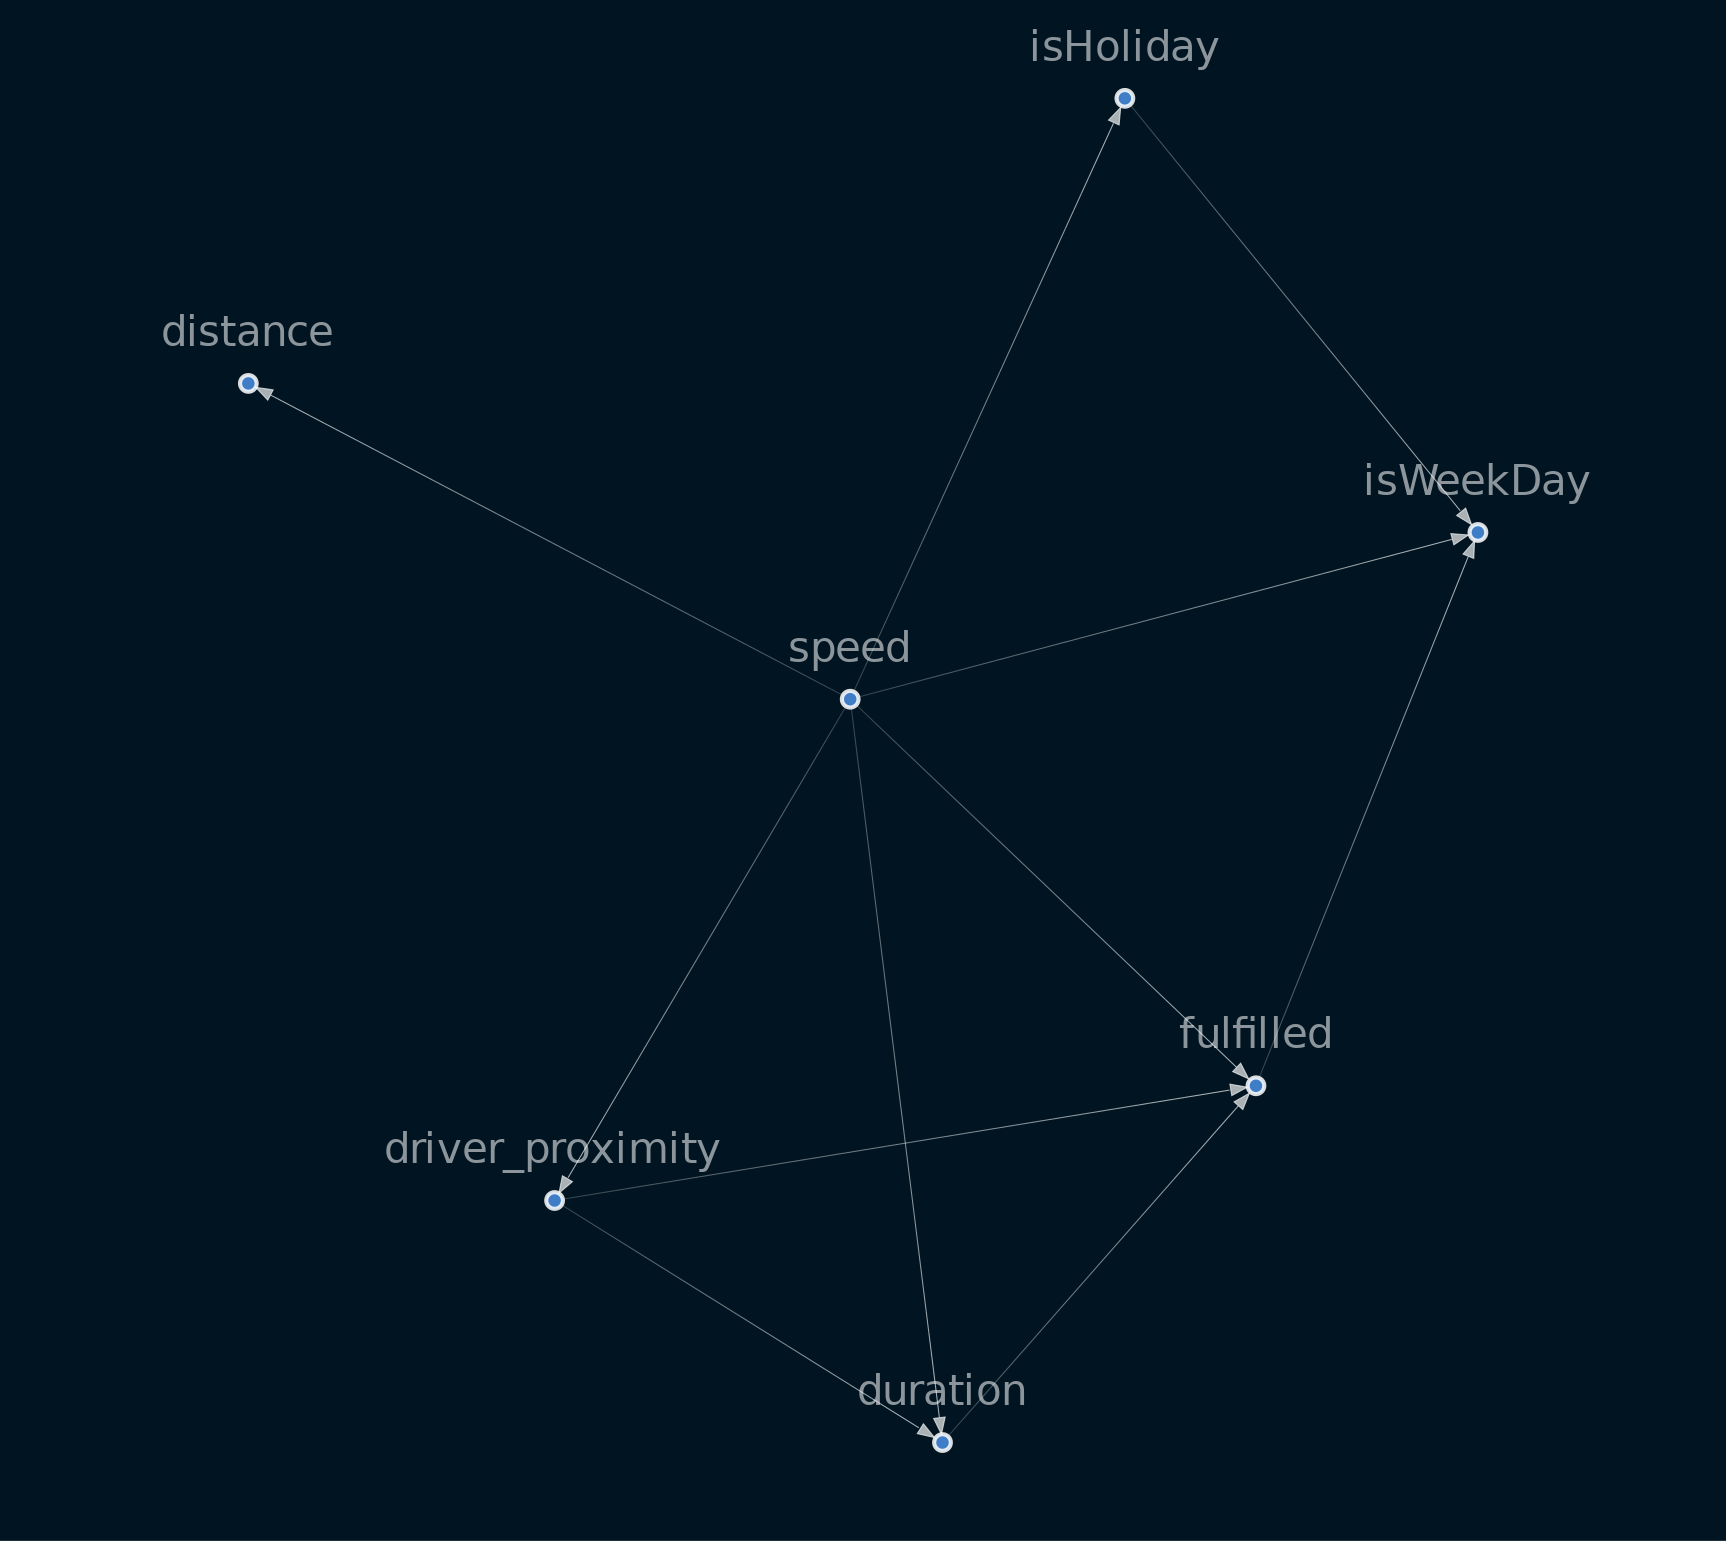

In [71]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

From the above DAG, we can see many correct and incorrect relations. 

For Example
- Correct Relations
  - speed `=>` duration
  - driver_proximity `=>` duration
  - driver_proximity `=>` fulfilled
  - isHoliday `=>` isWeekDay
- Incorrect Relations
  - speed `=>` isHoliday
  - speed `=>` distance
  - fulfilled `=>`isWeekday and etc,.

### Rerun the structure learning with some added constraints to avoid erroneous relationships

In [75]:
sm = from_pandas(df_causal_norm, tabu_edges=[("speed", "isHoliday"),("speed","distance"),("fulfilled","isWeekDay")], w_threshold=0.8)


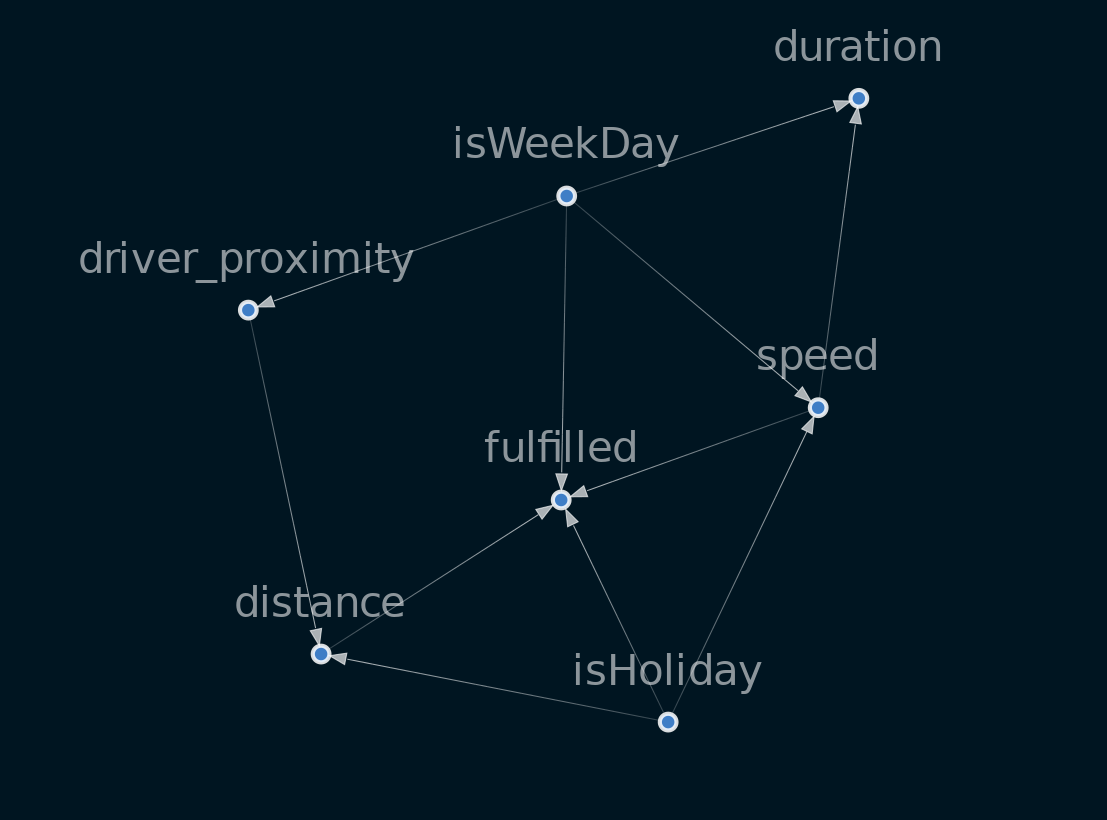

In [100]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "1"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [80]:
# logical modifications 
sm.add_edge("isWeekDay", "speed")
sm.remove_edge("speed", "isWeekDay")


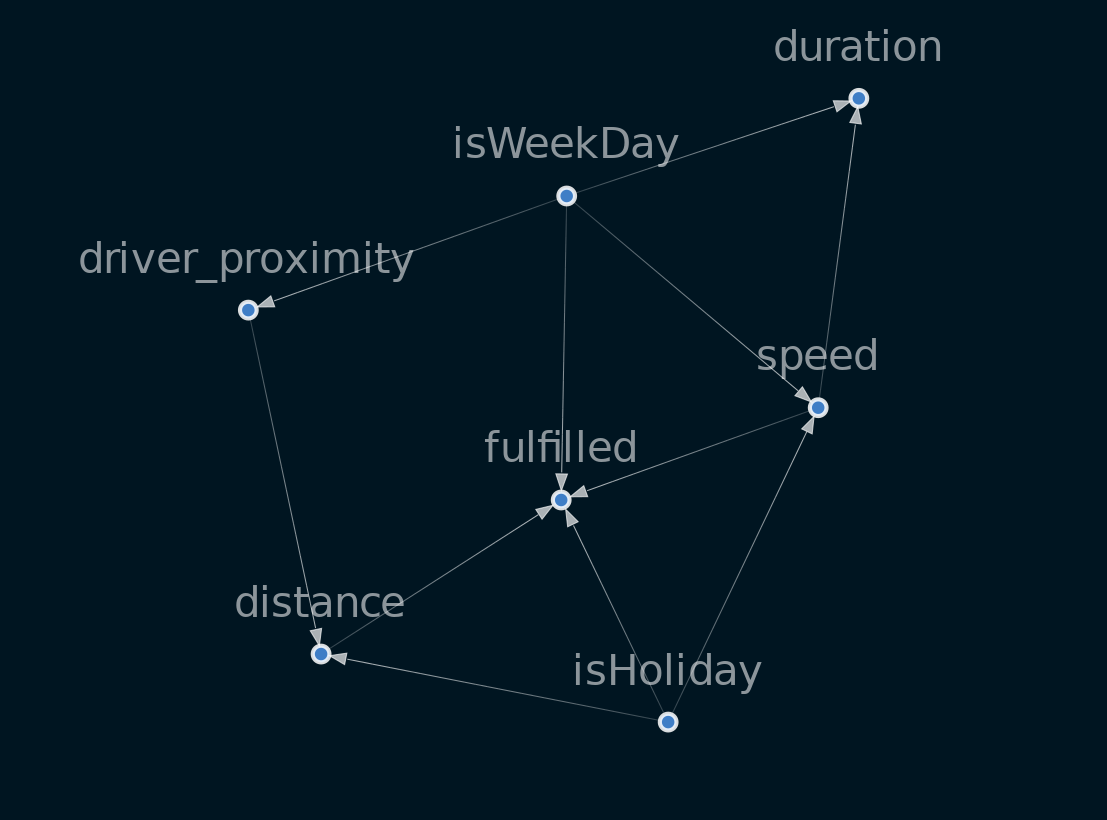

In [101]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "1"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

### Exporting structure


In [92]:
import networkx as nx

nx.drawing.nx_pydot.write_dot(sm, '../graphs/graph.dot')

### Fitting the Conditional Distribution of the Bayesian Network

In [102]:
from causalnex.network import BayesianNetwork

bn = BayesianNetwork(sm)

## Preparing the Discretised Data

In [129]:
df_disc = df_causal.copy()

In [130]:
df_disc.columns

Index(['distance', 'isWeekDay', 'duration', 'isHoliday', 'speed',
       'driver_proximity', 'fulfilled'],
      dtype='object')

### reverse categorical features

In [131]:
df_disc['isWeekDay'] = df_disc['isWeekDay'].apply(lambda x: 'weekday' if x == 1 else 'weekend')
df_disc['isHoliday'] = df_disc['isHoliday'].apply(lambda x: 'holiday' if x == 1 else 'no-holiday')
df_disc['fulfilled'] = df_disc['fulfilled'].apply(lambda x: 'fulfilled' if x == 1 else 'unfulfilled')


In [132]:
df_disc.head(4)

,distance,isWeekDay,duration,isHoliday,speed,driver_proximity,fulfilled
0,21048.291786,weekday,217.0,no-holiday,96.996736,693.616345,fulfilled
1,8160.545042,weekday,2055.0,no-holiday,3.971068,1968.052120,fulfilled
2,5067.848407,weekday,3681.0,no-holiday,1.376759,2954.031519,fulfilled
3,5603.770382,weekday,2102.0,no-holiday,2.665923,1197.387881,fulfilled


### discretise

In [133]:
from causalnex.discretiser import Discretiser

<AxesSubplot:>

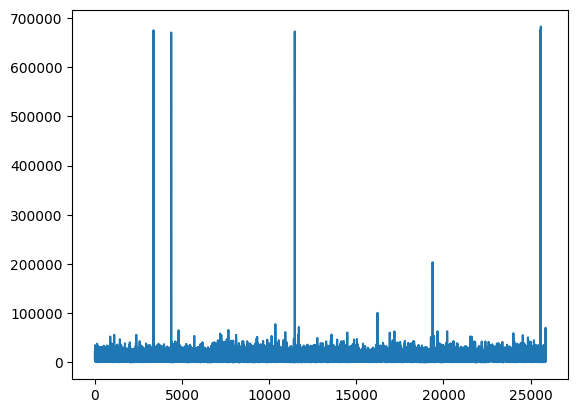

In [134]:
df_disc.distance.plot()

In [135]:
df_disc.describe()

,distance,duration,speed,driver_proximity
count,25871.000000,25871.000000,25871.000000,25871.000000
mean,11536.180757,3772.363109,13.412700,1593.513835
std,12136.372978,7115.513966,80.391011,4647.080656
min,16.471055,16.000000,0.005076,0.000000
25%,5369.247981,1668.000000,1.999265,821.627089
50%,9816.814170,2776.000000,3.226599,1414.880117
75%,15841.895164,4243.000000,5.123073,1934.607405
max,682878.368122,326248.000000,5153.210716,659052.705726


In [136]:
df_disc["distance"] = Discretiser(method="fixed", 
                                           numeric_split_points=[100,1000,5000,10000,20000]).transform(df_disc["distance"].values)
df_disc["distance"].value_counts()

4    9011
3    7307
2    5493
5    3682
1     376
0       2
Name: distance, dtype: int64

<AxesSubplot:>

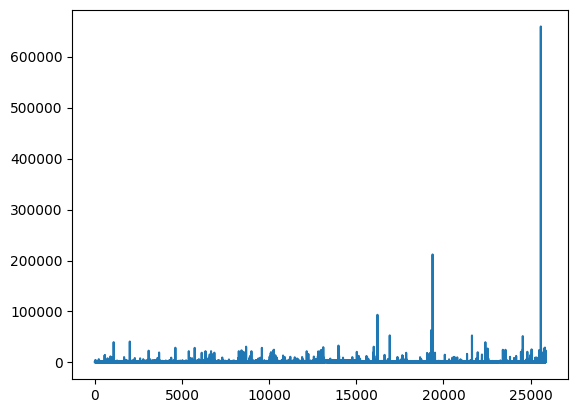

In [137]:
df_disc.driver_proximity.plot()

In [138]:
df_disc["driver_proximity"] = Discretiser(method="fixed",
        numeric_split_points=[100,1000,5000,10000,20000]).transform(df_disc["driver_proximity"].values)
df_disc["driver_proximity"].value_counts()

2    17188
1     7866
0      591
3       91
4       84
5       51
Name: driver_proximity, dtype: int64

In [145]:
df_disc["speed"] = Discretiser(method="fixed",
        numeric_split_points=[1,100]).transform(df_disc["speed"].values)
df_disc["speed"].value_counts()

1    23514
0     1789
2      568
Name: speed, dtype: int64

In [154]:
df_disc["duration"] = Discretiser(method="fixed",
        numeric_split_points=[60,3600,7200]).transform(df_disc["duration"].values)
df_disc["duration"].value_counts()

1    16706
2     7061
3     1790
0      314
Name: duration, dtype: int64

### Creating Labels for the Numerical Features

In [162]:
distance = {0: "short", 1: "1km", 2: "5km",
            3: "10km", 4: "20km",  5: "long",
            }
driver_proximity = {0: "short", 1: "1km", 2: "5km",
            3: "10km", 4: "20km",  5: "long",
            }
duration = {0: "1min", 1: "1hr", 2: "2hr", 3: "above-2hr"}


speed = {
    0: "slow",
    1: "medium",
    2: "fast"
}

In [163]:

df_disc["distance"] = df_disc["distance"].map(distance)
df_disc["driver_proximity"] = df_disc["driver_proximity"].map(driver_proximity)
df_disc["speed"] = df_disc["speed"].map(speed)
df_disc["duration"] = df_disc["duration"].map(duration)

In [164]:
df_disc

,distance,isWeekDay,duration,isHoliday,speed,driver_proximity,fulfilled
0,long,weekday,1hr,no-holiday,medium,1km,fulfilled
1,10km,weekday,1hr,no-holiday,medium,5km,fulfilled
2,10km,weekday,2hr,no-holiday,medium,5km,fulfilled
3,10km,weekday,1hr,no-holiday,medium,5km,fulfilled
4,20km,weekday,1hr,no-holiday,medium,1km,fulfilled
...,...,...,...,...,...,...,...
25866,5km,weekday,1hr,no-holiday,medium,5km,fulfilled
25867,5km,weekend,1hr,holiday,medium,5km,fulfilled
25868,long,weekend,1hr,holiday,medium,5km,fulfilled
25869,20km,weekday,2hr,no-holiday,medium,5km,fulfilled


# split the data into train/test set

In [167]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_disc, train_size=0.9, test_size=0.1, random_state=7)

### Model Probability
With the learnt structure model from earlier and the discretised data, we can now fit the probability distrbution of the Bayesian Network. The first step in this is specifying all of the states that each node can take. This can be done either from data, or providing a dictionary of node values. We use the full dataset here to avoid cases where states in our test set do not exist in the training set. For real-world applications, these states may need to be provided using the dictionary method.

In [168]:
bn = bn.fit_node_states(df_disc)

### fit Conditional Probability Distributions
The fit_cpds method of BayesianNetwork accepts a dataset to learn the conditional probablilty distributions (CPDs) of each node, along with a method of how to do this fit.

In [169]:

bn = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

In [172]:
bn.cpds["fulfilled"]

distance       10km                                                   \
isHoliday   holiday                                       no-holiday   
isWeekDay   weekday               weekend                    weekday   
speed          fast medium slow      fast    medium  slow       fast   
fulfilled                                                              
fulfilled       0.5    0.5  0.5  0.090909  0.991474  0.98   0.014925   
unfulfilled     0.5    0.5  0.5  0.909091  0.008526  0.02   0.985075   

distance                                 ...   short                      \
isHoliday                                ... holiday                       
isWeekDay                       weekend  ... weekday weekend               
speed          medium      slow    fast  ...    slow    fast medium slow   
fulfilled                                ...                               
fulfilled    0.987537  0.995074     0.5  ...     0.5     0.5    0.5  0.5   
unfulfilled  0.012463  0.004926     0.5  ...     0.5     0.5    0.5  0.5   

distance                                                 
isHoliday   no-holiday                                   
isWeekDay      weekday              weekend              
speed             fast medium  slow    fast medium slow  
fulfilled                                                
fulfilled          0.5    0.5  0.25     0.5    0.5  0.5  
unfulfilled        0.5    0.5  0.75     0.5    0.5  0.5  

[2 rows x 72 columns]